importing Dependencies

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [182]:
df = pd.read_csv('/content/mail_data.csv')

In [183]:
#Top 5 rows & columns
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
# find shape
df.shape

(5572, 2)

In [185]:



df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [186]:
#check null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


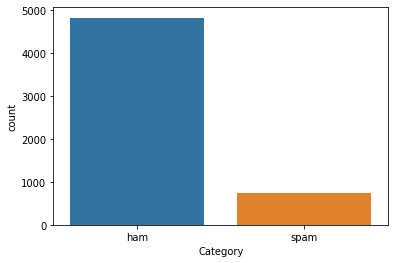

In [187]:
sns.countplot(df.Category)

Label Encoder

In [209]:
# spam ---------> 1

# ham -----------> 0

#df.loc[df['Category']=='spam','Category']=0
#df.loc[df['Category']=='ham','Category']=1


              ########  OR  ##########


from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Category'] = lb.fit_transform(df['Category'])

Splitting the Data into x & y

In [210]:
x = df['Message']
y = df['Category']

In [211]:
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


Splitting data into train data & test Data

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape,x_test.shape,df.shape)

(4457,) (1115,) (5572, 2)


Feature Extraction


In [213]:
# text data into feature vectors
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [214]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [215]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [216]:
#Before change
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [217]:
#After change
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training model

Logistic Regression

In [218]:
model = LogisticRegression()

In [219]:
model.fit(x_train_features,y_train)

LogisticRegression()

Model Evaluation

In [220]:
x_train_pred = model.predict(x_train_features)

In [221]:
x_train_accuracy = accuracy_score(x_train_pred,y_train)

In [222]:
print('x_train_accuracy is : ',x_train_accuracy)

x_train_accuracy is :  0.9670181736594121


In [223]:
x_test_pred = model.predict(x_test_features)

In [224]:
x_test_accuracy = accuracy_score(x_test_pred,y_test)

In [225]:
print('x_test_accuracy is : ',x_test_accuracy )

x_test_accuracy is :  0.9659192825112107


check Prediction

In [226]:
input_mail = ["Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16"]

# Convert Text to Feature extraction
input_data_features = feature_extraction.transform(input_mail)

#making Prediction

prediction = model.predict(input_data_features)
print(prediction)


# Condition

if (prediction[0]==0):
  print('ham mail')
else:
  print('spam mail')

[1]
spam mail
